ref <cite id="fyoji"><a href="#zotero%7C8700840%2FWIXM976C">(Graffitti et al., 2018)</a></cite>

In [1]:
from citrine import *
from citrine.crystals import ppKTP
import numpy as np
import matplotlib.pyplot as plt

Define central wavelengths for pump, signal, and idler

In [2]:
lambda_p_central = Wavelength(775, Magnitude.nano)
lambda_s_central = Wavelength(1550, Magnitude.nano)
lambda_i_central = Wavelength(1550, Magnitude.nano)

In [3]:
# Define a range of wavelengths for signal and idler (in nm)
spectral_width = Wavelength(50, Magnitude.nano)
steps = 128
lambda_s = spectral_window(lambda_s_central, spectral_width, steps)
lambda_i = spectral_window(lambda_i_central, spectral_width, steps)

In [4]:
# Calculate grating period
grating_period = calculate_grating_period(
    lambda_p_central,
    lambda_s_central,
    lambda_i_central,
    ppKTP,
)

In [5]:
# Calculate Δk matrix
delta_k = delta_k_matrix(
    lambda_p_central,
    lambda_s,
    lambda_i,
    ppKTP,
)

In [6]:
# Calculate the phase matching function
phase_matching = phase_matching_function(delta_k, grating_period, 1e-2)

In [7]:
# Define pump bandwidth (in nm and convert)
sigma_lambda_p = Wavelength(0.5, Magnitude.nano)
sigma_p = 2 * np.pi * bandwidth_conversion(sigma_lambda_p, lambda_p_central)

In [8]:
# Calculate the Gaussian pump envelope
pump_envelope = pump_envelope_gaussian(
    lambda_p_central, sigma_p, lambda_s, lambda_i
)

In [9]:
# Calculate the Joint Spectral Amplitude (JSA)
JSA = pump_envelope * phase_matching

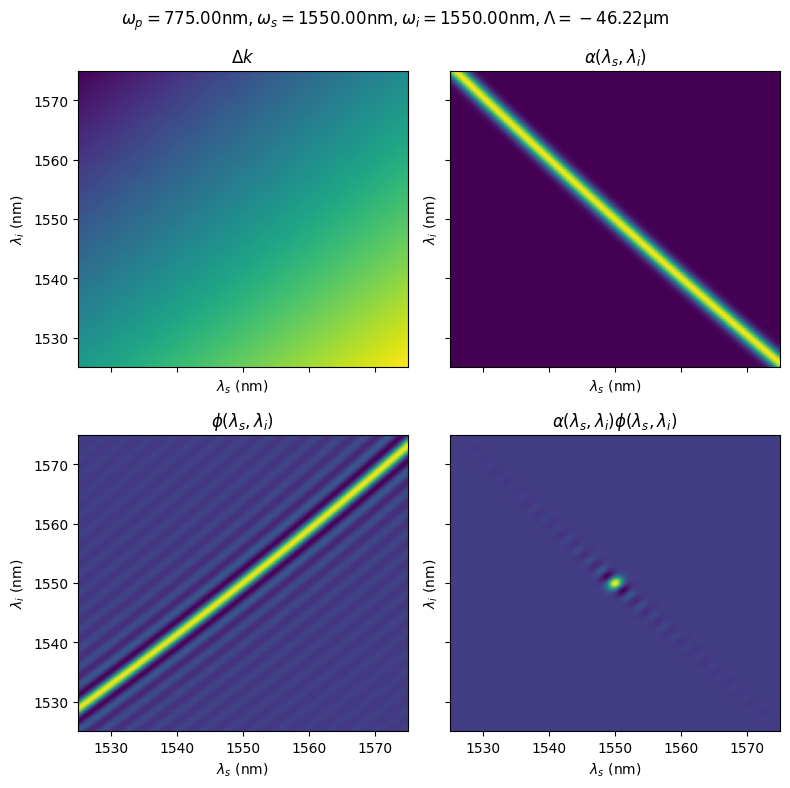

In [10]:
# Plot the results
fig, axs = plt.subplots(
    2, 2, figsize=(8, 8), sharex=True, sharey=True, squeeze=True
)

# Plot Δk
axs[0, 0].pcolormesh(
    lambda_i.value,
    lambda_s.value,
    delta_k,
    cmap='viridis',
    shading='gouraud',
)
axs[0, 0].set_title(r'$\Delta k$')
axs[0, 0].set_xlabel(r'$\lambda_s$ (nm)')
axs[0, 0].set_ylabel(r'$\lambda_i$ (nm)')

# Plot the pump envelope
axs[0, 1].pcolormesh(
    lambda_i.value,
    lambda_s.value,
    pump_envelope,
    cmap='viridis',
    shading='gouraud',
)
axs[0, 1].set_title(r'$\alpha(\lambda_s, \lambda_i)$')
axs[0, 1].set_xlabel(r'$\lambda_s$ (nm)')
axs[0, 1].set_ylabel(r'$\lambda_i$ (nm)')

# Plot the phase matching function
axs[1, 0].pcolormesh(
    lambda_i.value,
    lambda_s.value,
    phase_matching,
    cmap='viridis',
    shading='gouraud',
)
axs[1, 0].set_title(r'$\phi(\lambda_s, \lambda_i)$')
axs[1, 0].set_xlabel(r'$\lambda_s$ (nm)')
axs[1, 0].set_ylabel(r'$\lambda_i$ (nm)')

# Plot the Joint Spectral Amplitude (JSA)
axs[1, 1].pcolormesh(
    lambda_i.value, lambda_s.value, JSA, cmap='viridis', shading='gouraud'
)
axs[1, 1].set_title(
    r'$\alpha(\lambda_s, \lambda_i) \phi(\lambda_s, \lambda_i)$'
)
axs[1, 1].set_xlabel(r'$\lambda_s$ (nm)')
axs[1, 1].set_ylabel(r'$\lambda_i$ (nm)')

# Add overall title
fig.suptitle(
    r'$\omega_p = {:.2f}\mathrm{{nm}}, \omega_s = {:.2f}\mathrm{{nm}}, \omega_i = {:.2f}\mathrm{{nm}}, \Lambda = {:.2f}\mathrm{{\mu m}}$'.format(
        lambda_p_central.value,
        lambda_s_central.value,
        lambda_i_central.value,
        grating_period * (1e6),
    )
)

# Show plot
plt.tight_layout()

<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry"><i id="zotero|8700840/WIXM976C"></i>Graffitti, F., Kelly-Massicotte, J., Fedrizzi, A., &#38; Brańczyk, A. M. (2018). Design considerations for high-purity heralded single-photon sources. <i>Physical Review A</i>, <i>98</i>(5), 053811. <a href="https://doi.org/10.1103/PhysRevA.98.053811">https://doi.org/10.1103/PhysRevA.98.053811</a></div>
</div>
<!-- BIBLIOGRAPHY END -->